## heart_failure_clinical_records_dataset
### Bambang Ary Nugroho
### 06-03-2022

- #### 1. Introduction
- #### 2. Load data 
    - 2.1 Load data
    - 2.2 Cek Misisng Value
- #### 3. Visualisasi Data
- #### 4. Data Preprocessing
    - 4.1 Mengganti nama kolom
    - 4.2 Standarisasi
- #### 5. Modeling
    - 5.1 Logistik Regression
    - 5.2 KNN
    - 5.3 Random Forest
    - 5.4 Ensemble modeling ( Voting Classifier)
- #### 6. Plot Akurasi Modeling

### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

## 1. Introduction

Data yang digunakan adalah heart_failure_clinical_records_dataset, untuk mempredikasi keselamatan dari penyakit jantung. Model Machine learning yang digunakan adalah single classification dengan model RandomForest, KNN dan Logistik Regresssion, kemudian menggunakan model ensemble dengan pendekatan VotingClassifier

## 2. Load Data

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [47]:
df.describe()

,age,anaemia,Creatinine Phosphokinase,diabetes,Ejection Fraction,High Blood Pressure,platelets,Serum Creatinine,Serum Sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 2.2 Cek Missing Value

In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Visualisasi Data

Visualisasi pada setiap feature menggunakan visualisasi boxplot. Untuk kolom target di visualisasikan perbandingan nilai yang akan diprediksi yaitu angka 1 untuk 'yes' dan angka 0 untuk 'no'

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

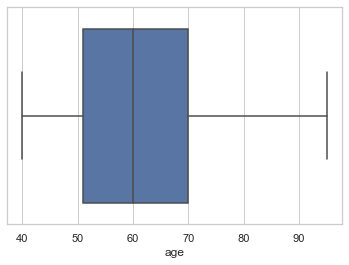

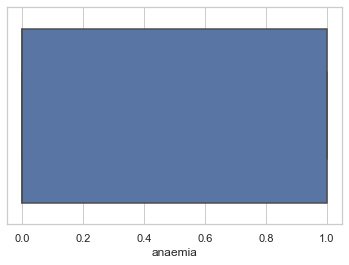

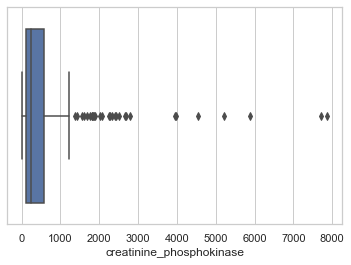

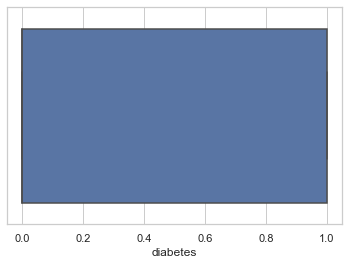

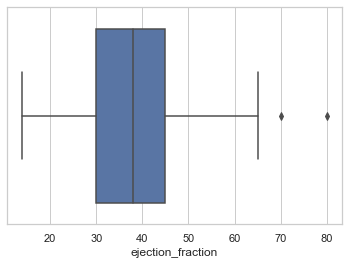

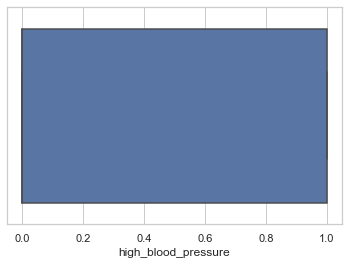

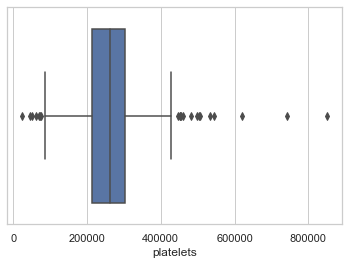

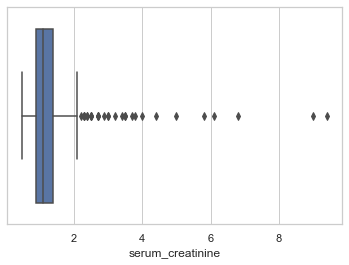

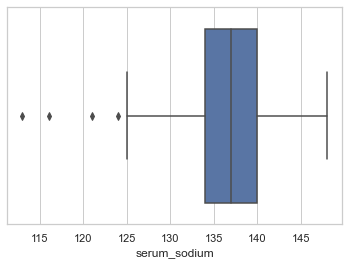

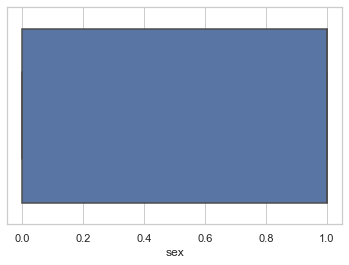

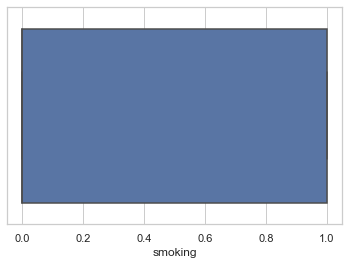

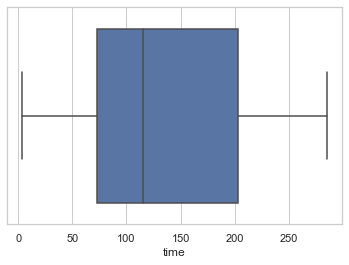

In [7]:
sns.set_theme(style='whitegrid')
for i in X.columns:
    plt.figure()
    sns.boxplot(x=df[i])

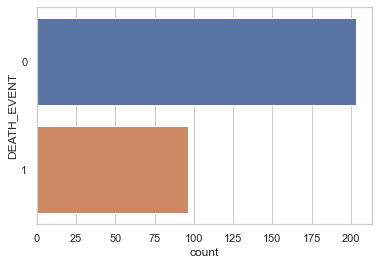

In [8]:
ax=sns.countplot(y='DEATH_EVENT',data=df)

## 4. Data Preprocessing

### 4.1 Mengganti/rename nama kolom

In [9]:
df.rename(columns={'creatinine_phosphokinase': 'Creatinine Phosphokinase',
 'ejection_fraction':'Ejection Fraction','high_blood_pressure':'High Blood Pressure', 
 'serum_creatinine':'Serum Creatinine','serum_sodium':'Serum Sodium'}, inplace=True)

### 4.2 Standarisasi nilai

karena skala nilai pada feature berbeda, maka saya lakukan standarisasi supaya nilainya memiliki skala yang sama

In [10]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)


In [11]:
x_scaler[0]

array([ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, -8.47579380e-01,
       -1.53055953e+00,  1.35927151e+00,  1.68164843e-02,  4.90056987e-01,
       -1.50403612e+00,  7.35688190e-01, -6.87681906e-01, -1.62950241e+00])

## 5. Modeling

Pada modeling, pendekatan yang saya gunakan adalah VotingClassifier dengan menggunakan single klasifikasi model Logistik Regression, KNN dan Random Forest 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=1)

### 5.1 Logistic Regression

In [13]:
#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

### 5.2 KNN

In [14]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [15]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 9}


### 5.3 Random Forest

In [16]:

#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [17]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 200}


In [18]:
#test the three models with the test data and print their accuracy scores
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg {}'.format(log_reg.score(X_test, y_test)))

knn: 0.7666666666666667
rf: 0.9111111111111111
log_reg 0.8333333333333334


Hasil diatas menunjukan score untuk KNN 0.76 %, RF 0.91 dan Logistik Regression dengan score 0.83%

### 5.4 Voting Classsfier

In [19]:
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [20]:
voting_class=VotingClassifier(estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)], voting='hard')
voting_class.fit(X_train, y_train)

y_pred_voting = voting_class.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm_voting = confusion_matrix(y_test, y_pred_voting)
print('Confusion Matrix')
print(cm_voting)
class_report_voting = classification_report(y_test, y_pred_voting)
print('Classfication Report')
print(class_report_voting)
acc_score_voting = accuracy_score(y_test, y_pred_voting)

print('Accuracy of Voting classifier: {0:0.4f}'.format(acc_score_voting))
mse_voting = metrics.mean_squared_error(y_test, y_pred_voting)
print('Mean Squared Error for Voting Classifier model: {0:0.4f}'.format(mse_voting))

Confusion Matrix
[[60  4]
 [10 16]]
Classfication Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        64
           1       0.80      0.62      0.70        26

    accuracy                           0.84        90
   macro avg       0.83      0.78      0.80        90
weighted avg       0.84      0.84      0.84        90

Accuracy of Voting classifier: 0.8444
Mean Squared Error for Voting Classifier model: 0.1556


accuracy nya sebesar 84% dan f1-scorenya 0.70, performa model sudah cukup bagus

## 6. Plot akurasi modeling 

In [31]:
kfold = StratifiedKFold(n_splits=10)

In [44]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(VotingClassifier(estimators, voting='hard'))
classifiers.append(LogisticRegression(random_state = random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

In [53]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())


c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


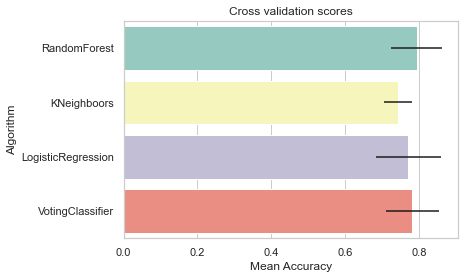

In [54]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["RandomForest","KNeighboors","LogisticRegression","VotingClassifier"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


### Kesimpulan

model yang sudah dibuat cukup memiliki peforma yang bagus